In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df_grid = pd.read_excel('./grid.xlsx', index_col=0)
df_grid = df_grid[df_grid.susceptance != 0] # leave out zero length network elements
df_grid['susceptance'] = df_grid['susceptance'].astype(float) / 10e6

df_substations = pd.read_excel('./substations.xlsx', index_col=0)

Grid = nx.from_pandas_edgelist(df_grid, 'substation_1', 'substation_2', edge_attr=["susceptance"])

In [57]:
display(df_grid)

,name,eic,tso,substation_1,substation_2,voltage,resistance,reactance,susceptance,length,zone,tieline
0,Eula - Röhrsdorf 203,11TD8L203------C,50HERTZ,744,570,220,4.0937,18.349,0.000016,51.511,DE,False
1,Röhrsdorf - Weida 207,11TD8L207------H,50HERTZ,570,148,220,7.5895,31.888,0.000035,98.324,DE,False
2,Eula - Weida 208,11TD8L208------9,50HERTZ,744,148,220,5.0537,19.541,0.000026,67.550,DE,False
3,Bentwisch - Güstrow 275,11TD8L275------7,50HERTZ,695,167,220,1.9090,12.055,0.000016,41.418,DE,False
4,Wuhlheide - Thyrow 291,11TD8L291------L,50HERTZ,687,6,220,2.9672,11.191,0.000027,38.882,DE,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2847,Buers - Westtirol rt (422),10T-AT-DE-000053,TRANSNETBW,870,794,400,0.9900,14.270,0.000017,91.400,DE,True
2848,Buers - Westtirol ws (421),10T-AT-DE-000061,TRANSNETBW,870,794,220,1.0000,14.365,0.000017,92.000,DE,True
2849,Buers - Y-Werben,11T-D4-D7-00001W,TRANSNETBW,870,987,220,0.5950,90.800,0.000007,47.000,DE,True
2850,Eichstetten - Muhlbach rt (Ill),10T-DE-FR-00002G,TRANSNETBW,543,236,400,0.3800,4.100,0.000007,17.380,DE,True


In [58]:
# Constructing PTDF

s = nx.get_edge_attributes(Grid, 'susceptance').values()
b = [x for x in s]
B = np.diag(b)

K = nx.incidence_matrix(Grid, oriented=True).todense()

H = B.dot(K.T)
L = K.dot(H)
L_inv = np.linalg.pinv(L)

PTDF = H.dot(L_inv)

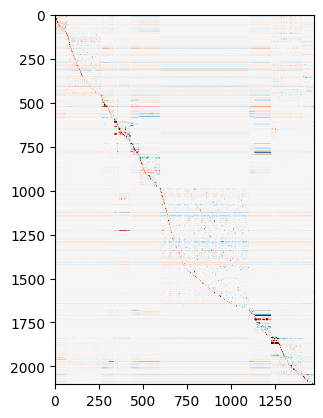

In [59]:
plt.imshow(PTDF, cmap="RdBu", vmin=-0.1, vmax=0.1)

In [60]:
PTDF

array([[-0.16899585,  0.08341097, -0.0258616 , ...,  0.02496034,
         0.00771392,  0.00705007],
       [-0.19349742,  0.04118135,  0.3190401 , ...,  0.01266059,
         0.01124794,  0.00859003],
       [-0.22799402, -0.0872778 , -0.11866915, ..., -0.03653876,
        -0.00099254, -0.00147249],
       ...,
       [-0.00067889, -0.00067889, -0.00067889, ..., -0.00067889,
        -0.00067889, -0.00067889],
       [-0.00067889, -0.00067889, -0.00067889, ..., -0.00067889,
        -0.00067889, -0.00067889],
       [-0.00067889, -0.00067889, -0.00067889, ..., -0.00067889,
        -0.00067889, -0.00067889]])

In [65]:
df_ptdf = pd.read_excel('./ptdfs_centred.xlsx', index_col=0)

In [78]:
observed_nodes = []

sum_e = 0
for eic in df_ptdf.eic.unique():
    if len(df_grid[df_grid.eic == eic]) > 1:
        #rint(eic)
        #rint(len(df_grid[df_grid.eic == eic]))
        sum_e += 1
    #observed_nodes.append(df_grid[df_grid == eic].index)
    
print(sum_e)

95
